# Introduction

Kara mistakenly (?!) forgot to patch a disulphide bridge in the 'H' chain.  And I copied that error. What effect this has had is the subject of this notebook. 

In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

### Active site

First look at the active site only. 

In [149]:
d_xtal = md.load('../data/MD/2agy_as_d.pdb')
h_xtal = md.load('../data/MD/2agy_as_h.pdb')

In [3]:
d_trajs = [md.load('../data/MD/trajectories/as_d_{}.xtc'.format(i+1), top='../data/MD/2agy_as_d.pdb') for i in range(100)]

h_trajs = [md.load('../data/MD/trajectories/as_h_{}.xtc'.format(i+1), top='../data/MD/2agy_as_h.pdb') for i in range(100)]

In [15]:
dt = 100/d_trajs[0].n_frames

In [138]:
ix = xtal.top.select('resSeq 82 and mass > 2'.format(res))
df_t,_ = d_trajs[0].top.to_dataframe()
df_x,_ = xtal.top.to_dataframe()

df_t.loc[ix, ]

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,N,N,82,ALA,0,D
2,3,CA,C,82,ALA,0,D
4,5,CB,C,82,ALA,0,D
8,9,C,C,82,ALA,0,D
9,10,O,O,82,ALA,0,D


In [197]:
alpha_ix = xtal.top.select('backbone')
d_trajs = [x.superpose(d_xtal) for x in d_trajs]
h_trajs = [x.superpose(h_xtal) for x in h_trajs]


In [200]:
ress = [82, 84, 109, 128, 160, 172]
all_dfs = []

for res in ress:
    print(res)
    ix = xtal.top.select('resSeq {} and mass > 2'.format(res))
    
#     d_trajs = [x.superpose(d_xtal, atom_indices=ix) for x in d_trajs]
#     h_trajs = [x.superpose(h_xtal, atom_indices=ix) for x in h_trajs]
    
    d_rmsf = [md.rmsf(traj, reference=None, atom_indices=ix) for traj in d_trajs]
    h_rmsf = [md.rmsf(traj, reference=None, atom_indices=ix) for traj in h_trajs]

    atoms = [np.array(list(xtal.top.atoms))[ix].astype(str) for _ in range(len(d_rmsf))]
    idx = [np.repeat(i, x.shape[0]) for i, x in enumerate(d_rmsf)]
    df = pd.DataFrame({'d': np.concatenate(d_rmsf), 'h': np.concatenate(h_rmsf), 'atoms': np.concatenate(atoms), 
                      'idx': np.concatenate(idx)})
    df['resNum'] = res
    all_dfs.append(df)

82
84
109
128
160
172


In [201]:
df = pd.concat(all_dfs)

In [211]:
dfm = df.melt(id_vars=['atoms', 'resNum', 'idx'], var_name='site', value_name='rmsf (nm)')
dfm.head()

,atoms,resNum,idx,site,rmsf (nm)
0,ALA82-N,82,0,d,0.091924
1,ALA82-CA,82,0,d,0.100399
2,ALA82-CB,82,0,d,0.136733
3,ALA82-C,82,0,d,0.092590
4,ALA82-O,82,0,d,0.107214


In [ ]:
sns.violinplot()

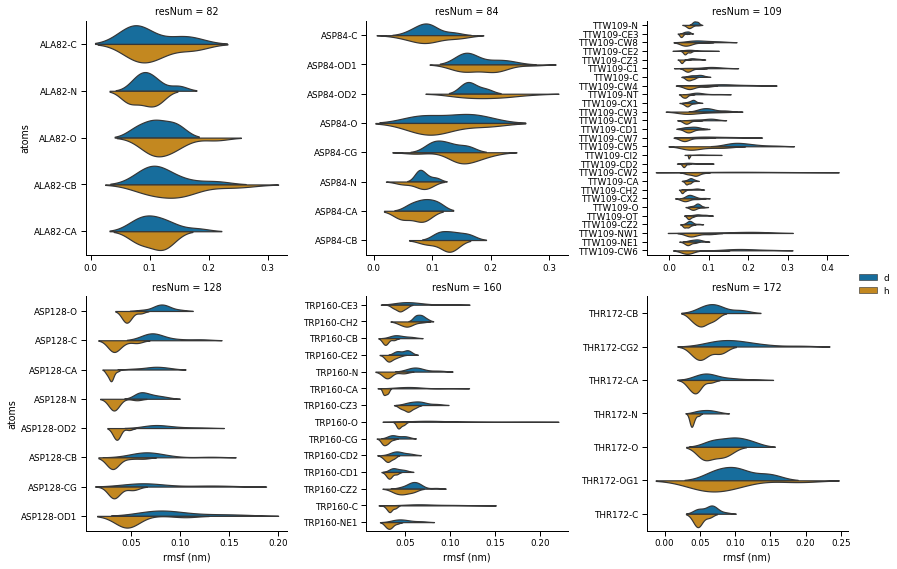

In [230]:
with sns.plotting_context('paper'):

    g = sns.FacetGrid(dfm.sample(frac=0.1), col='resNum', col_wrap=3, sharey=False, sharex=False, height=4)
    g.map(sns.violinplot, 'rmsf (nm)', 'atoms', 'site', orient='h', split=True, inner=None, hue_order=['d', 'h'], 
         palette='colorblind')
    g.add_legend()


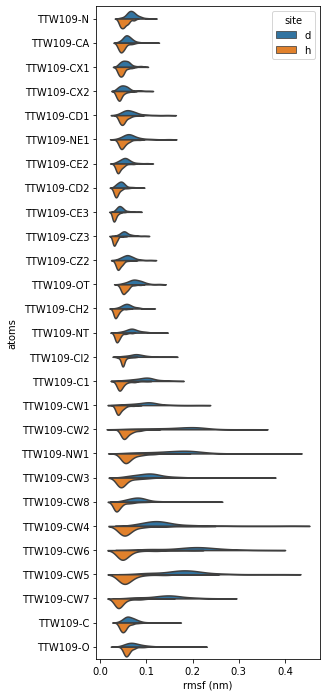

In [227]:
fig, ax = plt.subplots(figsize=(4, 12))
sns.violinplot('rmsf (nm)', 'atoms', 'site', orient='h', 
               split=True, inner=None, data=dfm.query('resNum==109'), ax=ax)


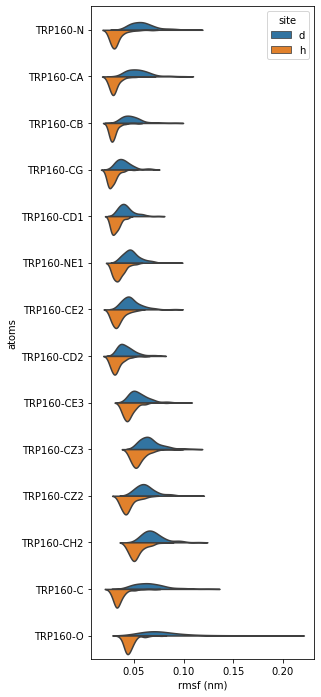

In [228]:
fig, ax = plt.subplots(figsize=(4, 12))
sns.violinplot('rmsf (nm)', 'atoms', 'site', orient='h', 
               split=True, inner=None, data=dfm.query('resNum==160'), ax=ax)
